In [78]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [80]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [81]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [82]:
EXPERIMENT_NAME = 'stress_testing_with_cols_imp_outliers'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '67b67c69-63b9-4ef1-9b02-dee66853eb46'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['No']

In [83]:
MODEL_NAMES = ['LogisticRegression']

FEATURE_IMPORTANCE = {
    'Original_Column': ['baseline', 'age', 'juv_other_count', 'priors_count', 'juv_fel_count'],
    'Column_Abs_Imp': [None, 0.40, 0.02, 0.56, 0.00],
    'Column_With_Imp': ['baseline', 'age (-0.40)', 'juv_other_count (0.02)', 'priors_count (0.56)', 'juv_fel_count (0.00)'],
}
feature_imp_df = pd.DataFrame.from_dict(FEATURE_IMPORTANCE)
feature_imp_df.head()

,Original_Column,Column_Abs_Imp,Column_With_Imp
0,baseline,NaN,baseline
1,age,0.40,age (-0.40)
2,juv_other_count,0.02,juv_other_count (0.02)
3,priors_count,0.56,priors_count (0.56)
4,juv_fel_count,0.00,juv_fel_count (0.00)


In [84]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [85]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [86]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(400, 25)

In [87]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.714015,0.718266,0.707317,0.710037,0.723404,0.707260,0.742574
1,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.685606,0.696594,0.668293,0.687732,0.680851,0.679157,0.712871
2,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,2,OK,2023-05-03 18:28:35.425,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.670455,0.678019,0.658537,0.669145,0.702128,0.660422,0.712871
3,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,3,OK,2023-05-03 18:28:35.435,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.715909,0.721362,0.707317,0.713755,0.723404,0.709602,0.742574
4,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,4,OK,2023-05-03 18:28:35.445,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.714015,0.718266,0.707317,0.710037,0.723404,0.707260,0.742574
5,Accuracy,201,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:29:06.978,...,200,200,"['priors_count', 'age', 'juv_other_count', 'ju...",0.679924,0.663609,0.706468,0.669145,0.708333,0.682464,0.669811
6,Accuracy,201,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:29:06.988,...,200,200,"['priors_count', 'age', 'juv_other_count', 'ju...",0.647727,0.620795,0.691542,0.617100,0.666667,0.646919,0.650943
7,Accuracy,201,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,2,OK,2023-05-03 18:29:06.999,...,200,200,"['priors_count', 'age', 'juv_other_count', 'ju...",0.683712,0.654434,0.731343,0.657993,0.708333,0.687204,0.669811
8,Accuracy,201,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,3,OK,2023-05-03 18:29:07.010,...,200,200,"['priors_count', 'age', 'juv_other_count', 'ju...",0.681818,0.669725,0.701493,0.680297,0.708333,0.687204,0.660377
9,Accuracy,201,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,4,OK,2023-05-03 18:29:07.020,...,200,200,"['priors_count', 'age', 'juv_other_count', 'ju...",0.679924,0.663609,0.706468,0.669145,0.708333,0.682464,0.669811


In [88]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [89]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [90]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1']['baseline'].head(50)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.714015,0.718266,0.707317,0.710037,0.723404,0.707260,0.742574
25,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.093071,0.099324,0.083219,0.000000,0.000000,0.088231,0.113532
50,F1,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.694949,0.740741,0.583333,0.746753,0.518519,0.705882,0.628571
75,FNR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.338462,0.257143,0.505882,0.248366,0.611111,0.318182,0.450000
100,FPR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.235075,0.310811,0.141667,0.344828,0.068966,0.265700,0.131148
125,IQR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.016981,0.017014,0.016929,0.017248,0.016368,0.017192,0.016091
150,Jitter,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.059788,0.064155,0.052909,0.057865,0.048430,0.056524,0.073589
175,Label_Stability,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.915758,0.907957,0.928049,0.917732,0.938936,0.920351,0.896337
200,Mean,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.515333,0.485430,0.562448,0.481083,0.571473,0.510196,0.537048
225,PPV,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,0,OK,2023-05-03 18:28:35.405,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.731915,0.738636,0.711864,0.741935,0.777778,0.731707,0.733333


In [91]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1']['priors_count'].head(50)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
1,Accuracy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.685606,0.696594,0.668293,0.687732,0.680851,0.679157,0.712871
26,Entropy,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.058368,0.062181,0.052360,0.000000,0.000000,0.052632,0.082621
51,F1,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.654167,0.713450,0.507246,0.723684,0.444444,0.669880,0.553846
76,FNR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.396154,0.302857,0.588235,0.281046,0.666667,0.368182,0.550000
101,FPR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.235075,0.304054,0.150000,0.353448,0.103448,0.270531,0.114754
126,IQR,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.022042,0.022633,0.021109,0.023004,0.021361,0.022275,0.021054
151,Jitter,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.037291,0.039936,0.033125,0.031316,0.021466,0.033268,0.054299
176,Label_Stability,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.947765,0.943282,0.954829,0.956989,0.973404,0.954145,0.920792
201,Mean,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.543016,0.499937,0.610892,0.487550,0.613360,0.532918,0.585707
226,PPV,101,LogisticRegression,"{'C': 0.01, 'class_weight': None, 'dual': Fals...",Run_1,COMPAS,200,1,OK,2023-05-03 18:28:35.415,...,100,100,"['priors_count', 'age', 'juv_other_count', 'ju...",0.713636,0.730539,0.660377,0.728477,0.666667,0.712821,0.720000


## Metrics Visualization and Reporting

In [92]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Specific subgroup metric per dataset and multiple models

In [93]:
visualizer.create_subgroups_grid_pct_lines_plot_for_col_imp(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                            model_name=MODEL_NAMES[0],
                                                            subgroup_metrics=['Jitter', 'Label_Stability', 'F1', 'Accuracy'],
                                                            sort_cols_lst=['baseline', 'juv_fel_count (0.00)',
                                                                           'juv_other_count (0.02)', 'age (-0.40)', 'priors_count (0.56)'],
                                                            feature_imp_df=feature_imp_df)

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and error level

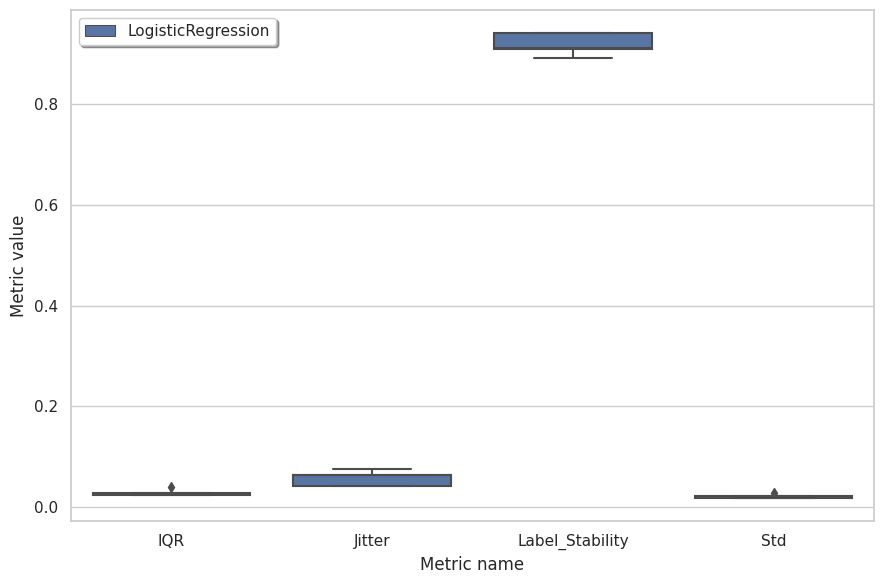

In [94]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance',
                                                                     figsize=(9, 6))

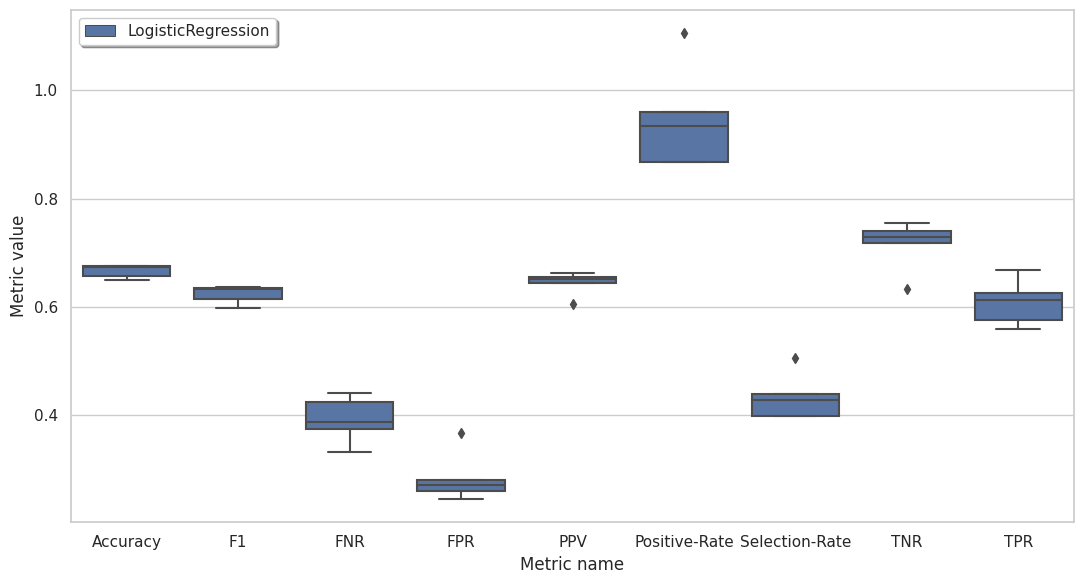

In [95]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error',
                                                                     figsize=(11, 6))

### One box plot for both error and variance metrics for subgroups

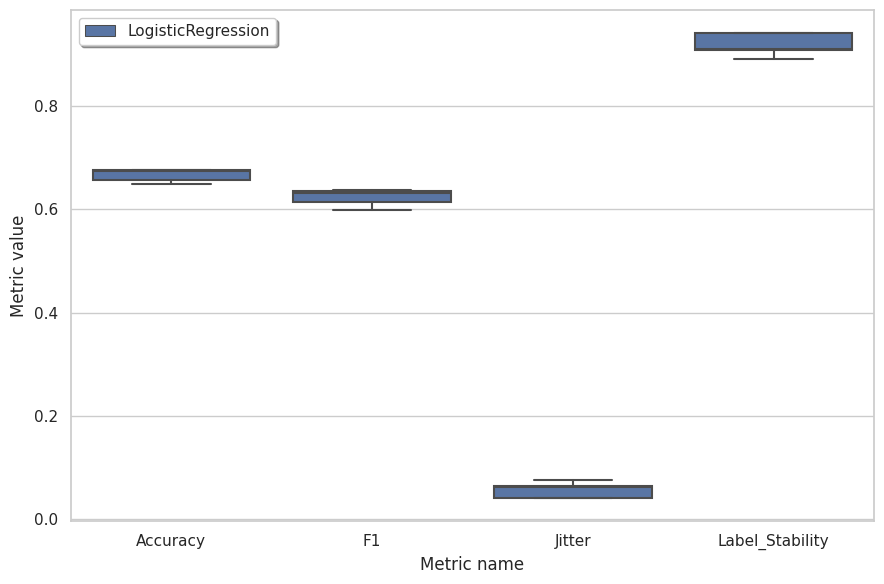

In [96]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'],
                                                                     figsize=(9, 6))